<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datos/df_merged.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

Text(0.5, 1.0, '% Peliculas vs Series')

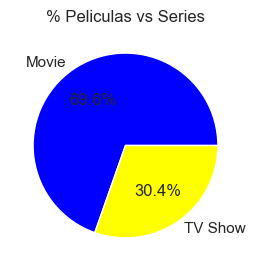

In [75]:


plt.figure(figsize=(3,3))
plt.pie(df['type'].value_counts(),
        labels=df['type'].unique(),
        autopct=  '%1.1f%%',
        colors=['blue', 'yellow']);

plt.title("% Peliculas vs Series")


#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



Text(0.5, 1.0, 'Cantidad de Titulos por Calificacion')

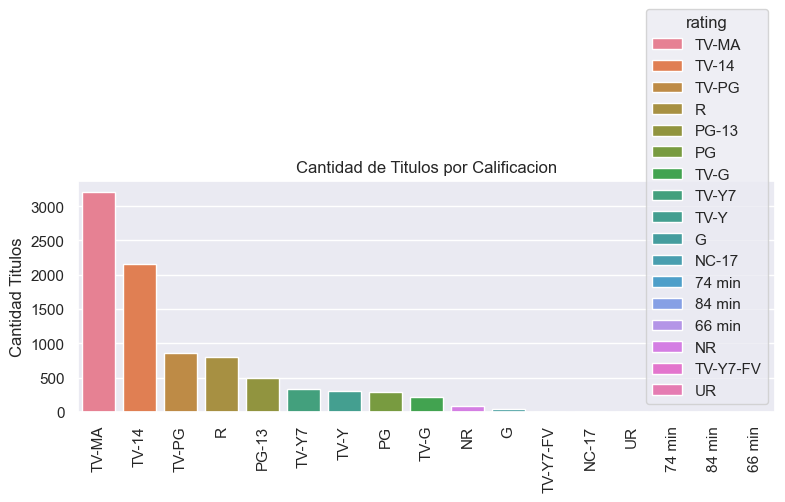

In [76]:
plt.figure(figsize=(9,3))
sns.palettes.color_palette = 'cividis'

orden = df['rating'].value_counts().index
sns.countplot(x=df['rating'],
              hue=df['rating'],
              order=orden)

plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('Cantidad Titulos')
plt.title('Cantidad de Titulos por Calificacion')

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



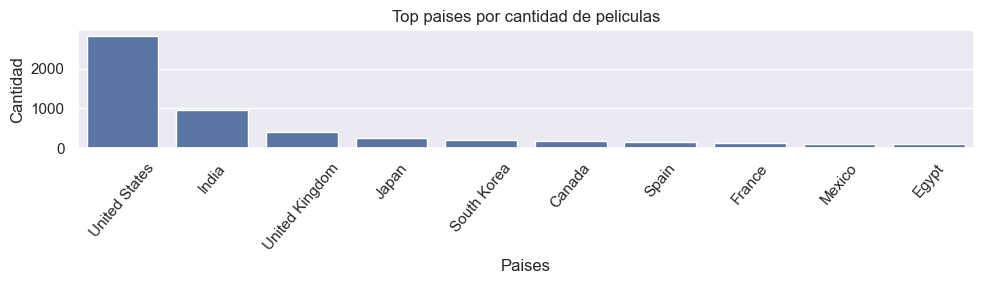

In [77]:
df_paises = df.groupby('country')[['title']].count().sort_values(by='title', ascending=False).head(10).reset_index()

plt.figure(figsize=(10,3))
sns.barplot(y=df_paises['title'], x=df_paises['country'])

plt.xlabel("Paises")
plt.ylabel("Cantidad")
plt.title("Top paises por cantidad de peliculas")
plt.xticks(rotation=50)

plt.tight_layout()

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

C:\Users\JLFA\AppData\Local\Temp\ipykernel_4808\4266251248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_5['IMDB Score'], x=df_5['rating'], palette='rocket')


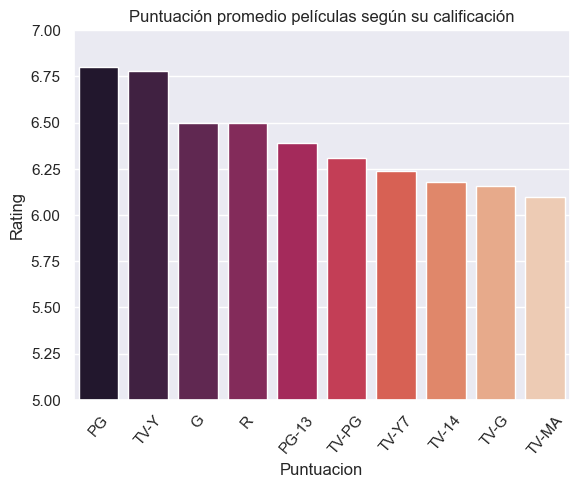

<Figure size 1500x500 with 0 Axes>

In [78]:
df_5 = df.groupby(['rating'])[['IMDB Score']].mean(numeric_only=True).sort_values(by='IMDB Score', ascending=False).reset_index()
df_5 = df_5[df_5['IMDB Score'].isnull() == False]

sns.barplot(y=df_5['IMDB Score'], x=df_5['rating'], palette='rocket')

plt.xlabel("Puntuacion")
plt.ylabel("Rating")
plt.title("Puntuación promedio películas según su calificación")
plt.xticks(rotation=50)
plt.ylim(5,7)
plt.figure(figsize=(15,5))

plt.tight_layout()

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


C:\Users\JLFA\AppData\Local\Temp\ipykernel_4808\3236760125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6['duration'] = df_6['duration'].str.replace(" min", '').astype(float)


Text(0.5, 1.0, 'Relación entre la duración de las películas y su puntuación')

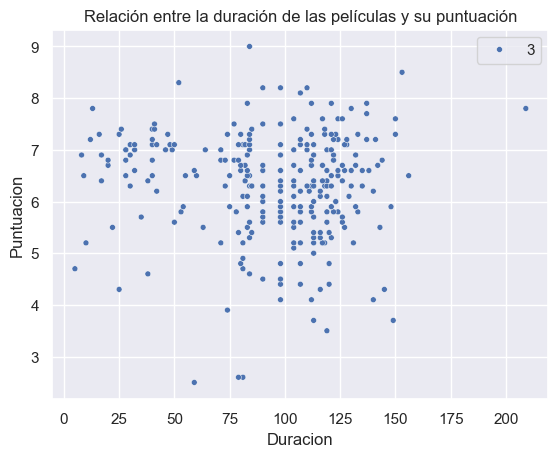

In [79]:
df_6 = df[df['type'] == 'Movie']
df_6['duration'] = df_6['duration'].str.replace(" min", '').astype(float)

sns.scatterplot(y=df_6['IMDB Score'], x=df_6['duration'], size=3)

plt.xlabel("Duracion")
plt.ylabel("Puntuacion")
plt.title("Relación entre la duración de las películas y su puntuación")


#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

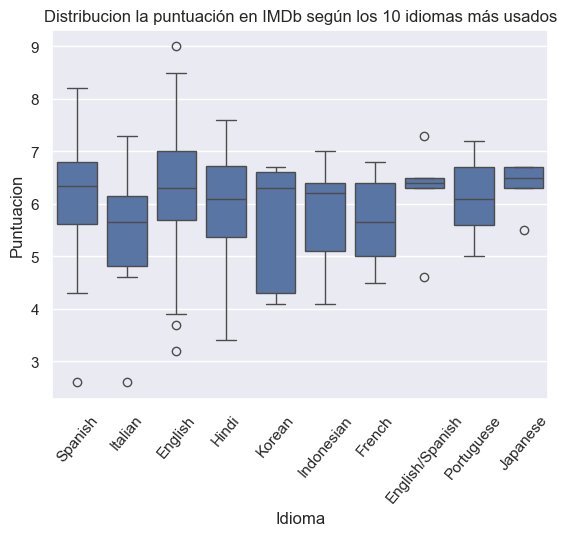

In [80]:
df_7 = df[df['Language'].isin(df["Language"].value_counts().head(10).keys())]
sns.boxplot(y=df_7['IMDB Score'], x=df_7['Language'])

plt.xlabel("Idioma")
plt.ylabel("Puntuacion")
plt.title("Distribucion la puntuación en IMDb según los 10 idiomas más usados")

plt.xticks(rotation=50);

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



C:\Users\JLFA\AppData\Local\Temp\ipykernel_4808\2421036734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_8['IMDB Score'], y=df_8['director'], palette='rocket')


Text(0.5, 1.0, '10 directores que tienen las puntuaciones más altas')

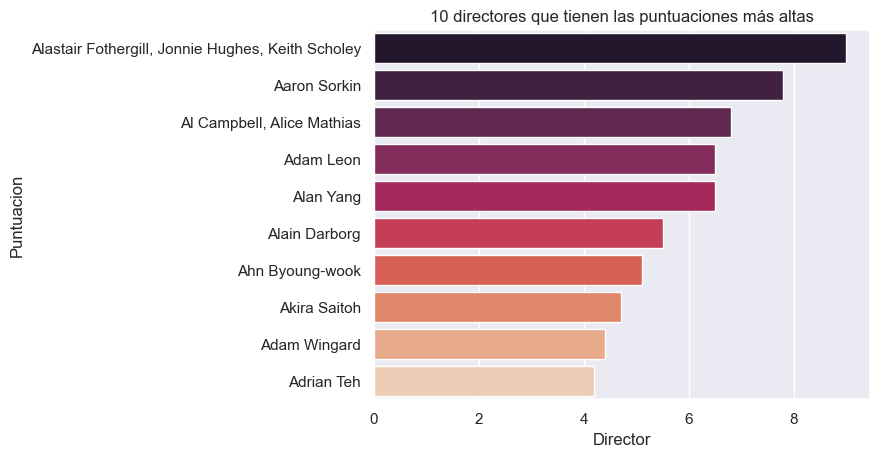

In [81]:
df_8 = df.groupby('director')[['IMDB Score']].value_counts().head(10).reset_index().sort_values(by='IMDB Score', ascending=False)

sns.barplot(x=df_8['IMDB Score'], y=df_8['director'], palette='rocket')

plt.xlabel("Director")
plt.ylabel("Puntuacion")
plt.title("10 directores que tienen las puntuaciones más altas")


#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


C:\Users\JLFA\AppData\Local\Temp\ipykernel_4808\2432037894.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df_tv_show['rating'], x=df_tv_show['title'], ax=axes[1], palette='rocket')


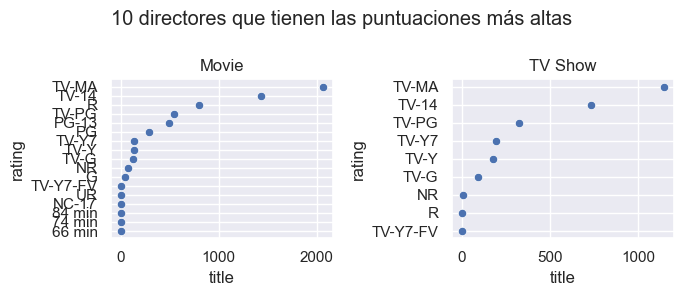

In [82]:
df_9 = df.groupby(['type','rating'])[['title']].count().sort_values(by='title', ascending=False).reset_index()
df_movie = df_9[df_9['type'] == 'Movie']
df_tv_show = df_9[df_9['type'] == 'TV Show']

fig, axes = plt.subplots(1,2, figsize=(7,3))

sns.scatterplot(y=df_movie['rating'], x=df_movie['title'], ax=axes[0])
sns.scatterplot(y=df_tv_show['rating'], x=df_tv_show['title'], ax=axes[1], palette='rocket')



axes[0].set_title('Movie')
axes[1].set_title("TV Show")

plt.suptitle("10 directores que tienen las puntuaciones más altas")

plt.tight_layout()

#### Ejercicio 10: ¿Cómo se distribuyen los títulos por país para los 6 principales países? Tienes que crear una gráfica para cada país mostrando los resultados en un subplot. Deberás: 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



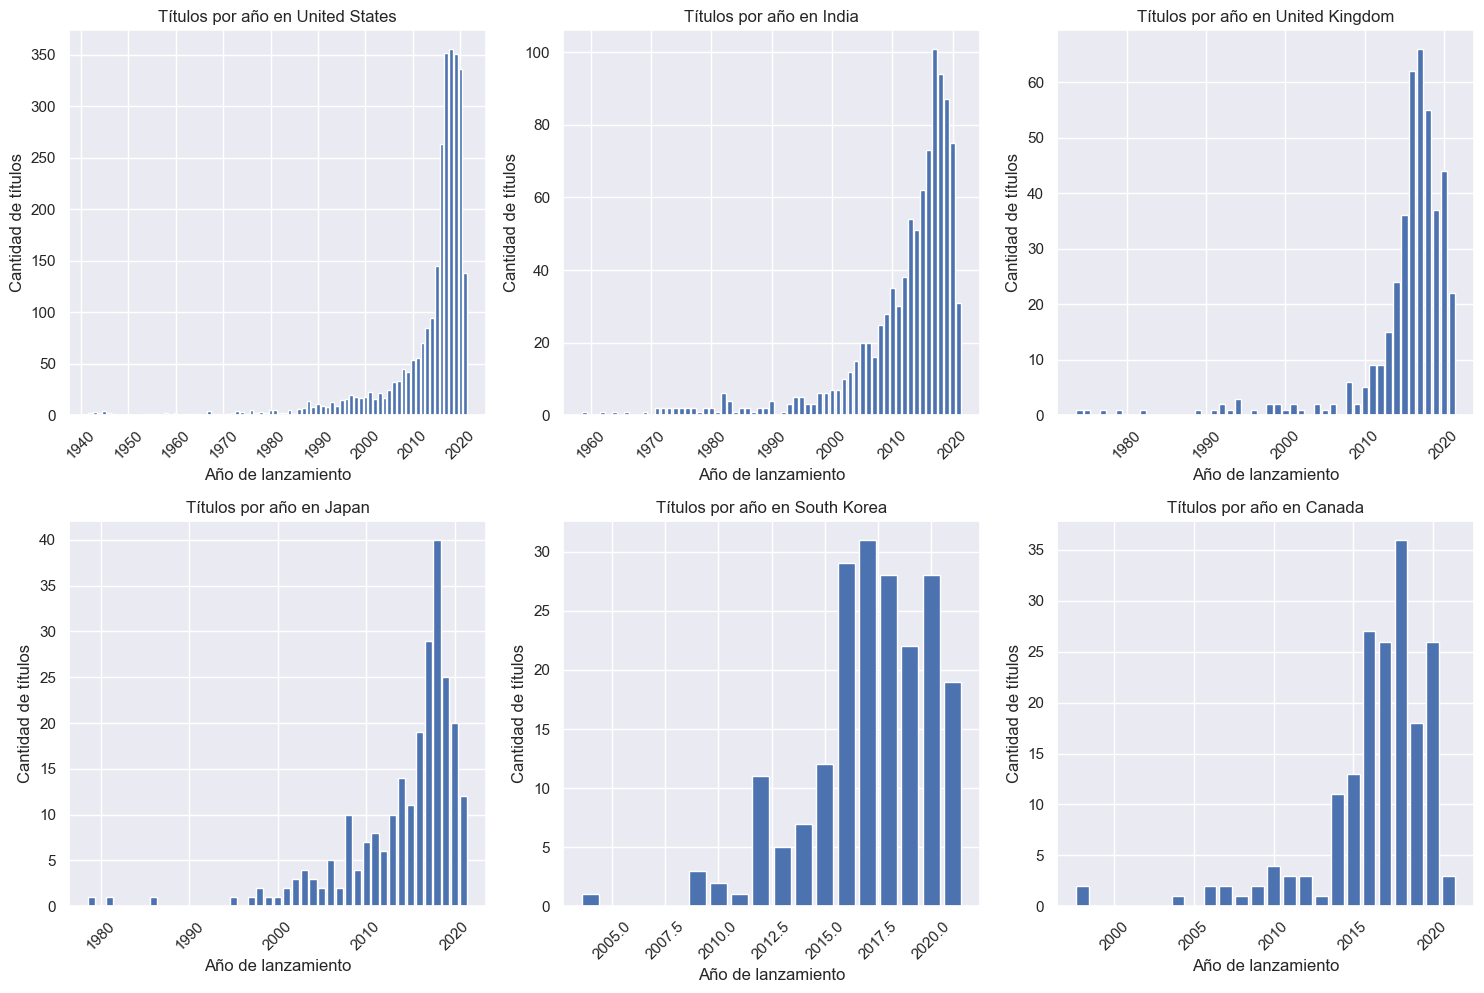

In [89]:
country_counts = df['country'].value_counts().head(6)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (country, count) in enumerate(country_counts.items()):
    country_data = df[df['country'] == country]['release_year'].value_counts().sort_index()

    axes[i].bar(country_data.index, country_data.values)
    axes[i].set_title(f'Títulos por año en {country}')
    
    axes[i].set_xlabel('Año de lanzamiento')
    axes[i].set_ylabel('Cantidad de títulos')
    
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

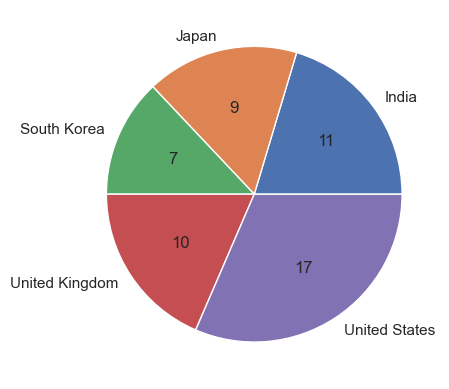

In [84]:
array_5_paises = df['country'].value_counts().head(5).index
df_11 = df[df['country'].isin(array_5_paises)]

df_11_sum = df_11.groupby(['country'])['rating'].unique().apply(len).reset_index()
df_11_sum

plt.pie(df_11_sum['rating'],
        labels=df_11_sum['country'].unique(),
         autopct=lambda p: f'{p * sum(df_11_sum["rating"]) / 100:.0f}'); #:.0f se utiliza para mostrar el numero sin decimales

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

C:\Users\JLFA\AppData\Local\Temp\ipykernel_4808\124637943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12_filtered['release_year'] = pd.to_datetime(df_12_filtered['release_year'])


<Axes: xlabel='release_year', ylabel='title'>

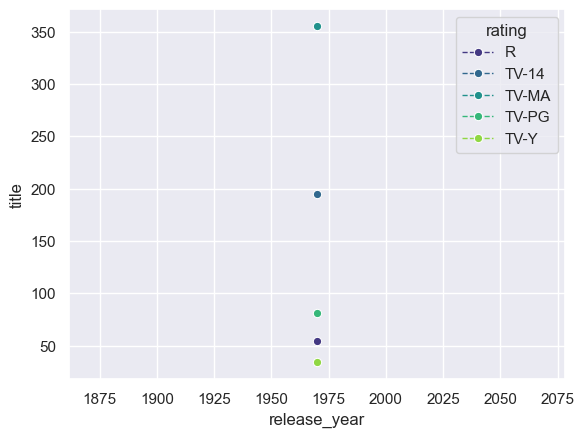

In [85]:
df_12 = df[df['release_year'].between(2014, 2024, inclusive='both')]
cinco_primeras_calificaciones = df_12['rating'].value_counts().head(5).keys()
df_12_filtered = df_12[df_12['rating'].isin(cinco_primeras_calificaciones)]

df_12_filtered['release_year'] = pd.to_datetime(df_12_filtered['release_year'])

df_12_ = df_12_filtered.groupby(['release_year', 'rating'])[['title']].count().reset_index()


#gp_df_12 = df_12_filtered.groupby(['rating'])[['title', 'release_year']].count()

df_12_.groupby(['rating','release_year'])['title'].sum().reset_index()

sns.lineplot(x=df_12_['release_year'].dt.year,
             y=df_12_['title'],
             palette = 'viridis', 
             hue = df_12_['rating'],
             errorbar= None,
             linewidth = 1,
             linestyle = "dashed", 
             marker = "o",)



### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.

In [86]:
df

,IMDB Score,Language,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,2.5,English/Japanese,s3624,Movie,Enter the Anime,Alex Burunova,"Kozo Morishita, Yoko Takahashi, Shinji Aramaki...","United States, Japan","August 5, 2019",2019,TV-MA,59 min,"Documentaries, International Movies",What is anime? Through deep-dives with notable...
1,2.6,Spanish,s2105,Movie,Dark Forces,Bernardo Arellano,"Tenoch Huerta, Eréndira Ibarra, Dale Carley, A...",Mexico,"August 21, 2020",2020,TV-MA,81 min,"Horror Movies, Independent Movies, Internation...","In search of his sister, a renegade criminal s..."
2,2.6,Italian,s3095,Movie,The App,Elisa Fuksas,"Vincenzo Crea, Jessica Cressy, Greta Scarano, ...",Italy,"December 26, 2019",2019,TV-MA,79 min,"Dramas, Independent Movies, International Movies","While in Rome to shoot his first movie, actor ..."
3,3.2,English,s5074,Movie,The Open House,"Matt Angel, Suzanne Coote","Dylan Minnette, Piercey Dalton, Patricia Bethu...","Canada, United States","January 19, 2018",2018,TV-MA,NaN,"Horror Movies, Thrillers","Following a tragedy, a mother and her teen son..."
4,3.4,Hindi,s1778,Movie,Kaali Khuhi,Terrie Samundra,"Shabana Azmi, Leela Samson, Sanjeeda Sheikh, S...",India,"October 30, 2020",2020,TV-14,NaN,"Horror Movies, International Movies",When a restless spirit curses a village that h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,NaN,NaN,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,NaN,NaN,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,NaN,NaN,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,NaN,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,NaN,NaN,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,NaN,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [87]:
df['rating'].value_counts().index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object', name='rating')

In [88]:
df_paises = df.groupby('country')[['title']].count().sort_values(by='title', ascending=False).head(10).index
